In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Importing face-mask-dataset

In [3]:
# Kaggle api
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:07<00:00, 26.6MB/s]
100% 163M/163M [00:07<00:00, 24.1MB/s]


In [4]:
!ls

face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed data
from zipfile import ZipFile

with ZipFile('face-mask-dataset.zip','r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [6]:
import os
#count the number of files
path, dir , files = next(os.walk('/content/data'))
file_count = len(files)
print('Number of images: '+ str(file_count))
print(dir)
print(path)

Number of images: 0
['without_mask', 'with_mask']
/content/data


In [7]:
import os
#count the number of files
path, dir , files = next(os.walk('/content/data/without_mask'))
file_count = len(files)
print('Number of images: '+ str(file_count))
print(dir)
print(path)
#count the number of files
path, dir , files = next(os.walk('/content/data/with_mask'))
file_count = len(files)
print('Number of images: '+ str(file_count))
print(dir)
print(path)

Number of images: 3828
[]
/content/data/without_mask
Number of images: 3725
[]
/content/data/with_mask


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

Printing the number of images ***without Mask***

In [9]:
file_names = os.listdir('/content/data/without_mask')
print(file_names)
print(len(file_names))

['without_mask_1199.jpg', 'without_mask_2045.jpg', 'without_mask_2369.jpg', 'without_mask_496.jpg', 'without_mask_2807.jpg', 'without_mask_89.jpg', 'without_mask_502.jpg', 'without_mask_2428.jpg', 'without_mask_3648.jpg', 'without_mask_2960.jpg', 'without_mask_3476.jpg', 'without_mask_1457.jpg', 'without_mask_1232.jpg', 'without_mask_3498.jpg', 'without_mask_2387.jpg', 'without_mask_2460.jpg', 'without_mask_879.jpg', 'without_mask_2205.jpg', 'without_mask_1924.jpg', 'without_mask_714.jpg', 'without_mask_2442.jpg', 'without_mask_2773.jpg', 'without_mask_991.jpg', 'without_mask_1759.jpg', 'without_mask_2268.jpg', 'without_mask_3330.jpg', 'without_mask_3428.jpg', 'without_mask_3415.jpg', 'without_mask_452.jpg', 'without_mask_1941.jpg', 'without_mask_1201.jpg', 'without_mask_3013.jpg', 'without_mask_1162.jpg', 'without_mask_80.jpg', 'without_mask_682.jpg', 'without_mask_1138.jpg', 'without_mask_2942.jpg', 'without_mask_3262.jpg', 'without_mask_3423.jpg', 'without_mask_2710.jpg', 'without_m

Printing the number of images ***with MASK***

In [10]:
file_names = os.listdir('/content/data/with_mask')
print(file_names)
print(len(file_names))

['with_mask_3536.jpg', 'with_mask_1265.jpg', 'with_mask_3039.jpg', 'with_mask_1615.jpg', 'with_mask_2969.jpg', 'with_mask_3451.jpg', 'with_mask_3383.jpg', 'with_mask_3702.jpg', 'with_mask_3330.jpg', 'with_mask_3689.jpg', 'with_mask_1258.jpg', 'with_mask_314.jpg', 'with_mask_1216.jpg', 'with_mask_224.jpg', 'with_mask_482.jpg', 'with_mask_1005.jpg', 'with_mask_2822.jpg', 'with_mask_700.jpg', 'with_mask_1462.jpg', 'with_mask_2868.jpg', 'with_mask_2998.jpg', 'with_mask_1617.jpg', 'with_mask_2557.jpg', 'with_mask_2994.jpg', 'with_mask_3713.jpg', 'with_mask_2005.jpg', 'with_mask_221.jpg', 'with_mask_2748.jpg', 'with_mask_3659.jpg', 'with_mask_3029.jpg', 'with_mask_3235.jpg', 'with_mask_423.jpg', 'with_mask_1347.jpg', 'with_mask_1425.jpg', 'with_mask_1288.jpg', 'with_mask_2231.jpg', 'with_mask_405.jpg', 'with_mask_225.jpg', 'with_mask_3284.jpg', 'with_mask_3433.jpg', 'with_mask_1166.jpg', 'with_mask_529.jpg', 'with_mask_2812.jpg', 'with_mask_752.jpg', 'with_mask_1773.jpg', 'with_mask_282.jpg'

**Creating Labels for two classes of Image**

with mask  --> 1
without mask ---> 0

In [11]:
# create the labels
with_mask_labels = [1]*3725

without_mask_labels = [0]* 3828

In [12]:
labels = with_mask_labels + without_mask_labels

### display images ***with MASK*** and  ***without MASK***

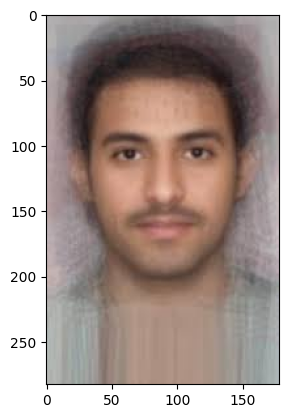

In [13]:
cimg = mpimg.imread('/content/data/without_mask/without_mask_2045.jpg')
cimgplot=plt.imshow(cimg)
plt.show()

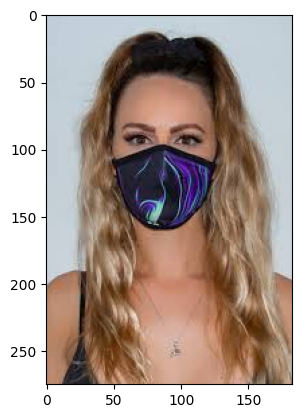

In [14]:
dimg = mpimg.imread('/content/data/with_mask/with_mask_2969.jpg')
dimgplot=plt.imshow(dimg)
plt.show()

In [15]:
#os.mkdir('/content/resized_data/')

In [16]:
orig_folder_with_mask = '/content/data/with_mask/'
orig_folder_without_mask = '/content/data/without_mask/'
#resized_folder = '/content/resized_data/'

In [17]:
#2 min 12 sec
file_name_with_mask = os.listdir(orig_folder_with_mask)
file_name_without_mask = os.listdir(orig_folder_without_mask)
data=[]

In [18]:
# processing images ***with MASK***
for file_name in file_name_with_mask:
  img_path = orig_folder_with_mask+file_name
  img= Image.open(img_path)
  img=img.resize((128,128))
  img=img.convert('RGB')
  img=np.array(img)
  data.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
# processing images ***without MASK***
for file_name in file_name_without_mask:
  img_path = orig_folder_without_mask+file_name
  img= Image.open(img_path)
  img=img.resize((128,128))
  img=img.convert('RGB')
  img=np.array(img)
  data.append(img)

7553 7553
(128, 128, 3)
<class 'numpy.ndarray'>
1


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
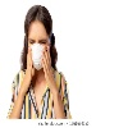

In [50]:
print(len(data),len(labels))
print(data[0].shape)
print(type(data[0]))
print(labels[0])
data[0]


In [21]:
#coverting image and label to numpy array
X = np.asarray(data)
Y = np.asarray(labels)
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)
Y.shape

[0 1]
[3828 3725]


(7553,)

In [22]:
print(X.shape,Y.shape)

(7553, 128, 128, 3) (7553,)


### Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


1600 --> training images

400 --> test images

In [25]:
X_train_scaled= X_train/255
X_test_scaled= X_test/255

In [26]:
print(X_train_scaled)

[[[[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[0.87843137 0.78039216 0.73333333]
   [0.64313725 0.51372549 0.4627451 ]
   [0.71764706 0.55686275 0.49803922]
   ...
   [0.89803922 0.74117647 0.65490196]
   [0.8627451  0.70588235 0.61960784]
   [0.82745098 0.67058824 0.58431373]]

  [[0.70980392 0.57254902 0.51372549]
   [0.6

### Building a Convolutional Neural Network (CNN)

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
# setting up layers of convolutional neural network

num_of_cls = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu' ))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))  # for switching off neurons to prevent overfitting of model

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))  # for switching off neurons to prevent overfitting of model

model.add(keras.layers.Dense(num_of_cls , activation='sigmoid')) #sigmnoid for binary class, softmax for multiclass

    # ouput Layer - 2 cause there is 2 class (Cat vs Dog  )

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [30]:
"""# from_logits = True is important

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)"""

#compiling NN

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

If you want to use "categorical_crossentropy", the labels should be one-hot-encoded. When your labels are given as an integer, changing to "sparse_categorical_crossentropy" is required. The advantage of using "categorical_crossentropy" is that it can give you class probabilities, which might be useful in some cases.

Accuracy on Train Data

In [31]:
## training the network (1 min)

Digit_NN=model.fit(X_train_scaled, Y_train, validation_split =0.1 , epochs=5) #epochs is how many times data will go through the model


Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4626 - accuracy: 0.7966 - val_loss: 0.2669 - val_accuracy: 0.8926
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2756 - accuracy: 0.8889 - val_loss: 0.2422 - val_accuracy: 0.9008
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2232 - accuracy: 0.9101 - val_loss: 0.2037 - val_accuracy: 0.9190
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1978 - accuracy: 0.9207 - val_loss: 0.2386 - val_accuracy: 0.9074
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1683 - accuracy: 0.9342 - val_loss: 0.2142 - val_accuracy: 0.9174


## Model Evaluation

In [33]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print(loss,accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2447 - accuracy: 0.9120
0.24473215639591217 0.9119788408279419


# Visualizing accuracy and loss

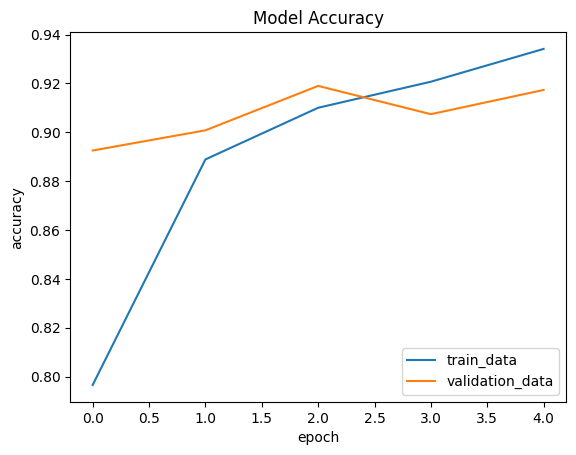

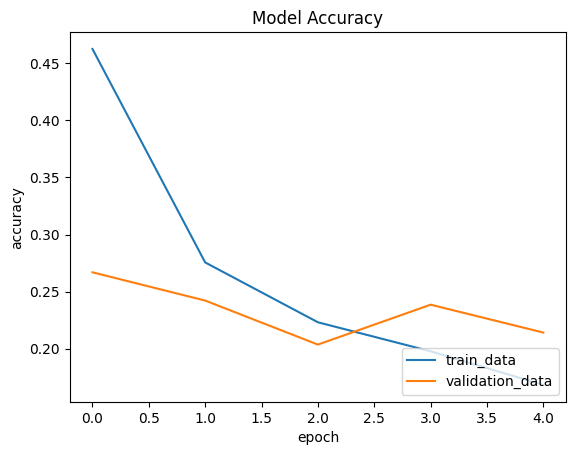

In [37]:
plt.plot(Digit_NN.history['accuracy'])
plt.plot(Digit_NN.history['val_accuracy'])



plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train_data','validation_data'],loc='lower right')
plt.show()

plt.plot(Digit_NN.history['loss'])
plt.plot(Digit_NN.history['val_loss'])



plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train_data','validation_data'],loc='lower right')
plt.show()

## Final Whole Code - Face Mask Detection Sytem

(503, 519, 3)


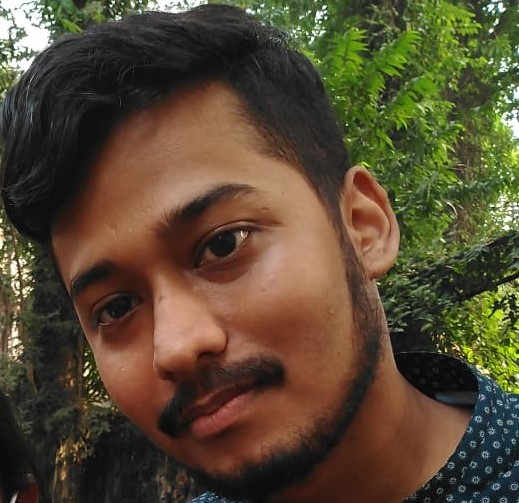

(128, 128, 3)
1/1 [==============================] - 0s 25ms/step
[[0.10638461 0.92112094]]
[0.106, 0.921]
1
SAFE ! Person is wearing Mask


In [52]:
#input_image_path= input('Path of the Image to be predicted')
input_image_path= ('/content/sample_1.jpg')
input_img=cv2.imread(input_image_path)
print(input_img.shape)
cv2_imshow(input_img)
input_res = cv2.resize(input_img,(128, 128))
print(input_res.shape)
#cv2_imshow(input_res)
input_res= input_res/255
reshaped_input_res = np.reshape(input_res, [1,128, 128 ,3]) ## Reshaping RGB Image
input_prediction=model.predict(reshaped_input_res)
print(input_prediction)
print([round(i,3) for i  in input_prediction[0]])
prediction=np.argmax(input_prediction)
print(prediction)
if(prediction==1):
  print('SAFE ! Person is wearing Mask')
else:
  print('COVID-19 ALERT ! Person is not wearing Mask')